## MODELADO

# Parte 1: Lectura de datos

In [176]:
# Paqueterias 
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
# Leer los datos 
datos_modelo = pd.read_csv('datos_completos.csv')

In [178]:
datos_modelo.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,ventas_totales_en_tienda_de_cada_mes,ventas_promedio_en_tienda_de_cada_mes,ventas_totales_en_tienda_de_cada_sku,ventas_promedio_en_tienda_de_cada_sku,ventas_totales_1_mes_pasado,...,ventas_totales_tienda_y_mes_3_pasado,ventas_promedio_tienda_y_mes_del_mes_pasado,ventas_promedio_tienda_y_mes_2_pasado,ventas_promedio_tienda_y_mes_3_pasado,ventas_totales_tienda_y_sku_del_mes_pasado,ventas_totales_tienda_y_sku_2_pasado,ventas_totales_tienda_y_sku_3_pasado,ventas_promedio_tienda_y_sku_del_mes_pasado,ventas_promedio_tienda_y_sku_2_pasado,ventas_promedio_tienda_y_sku_3_pasado
0,1,0,1,0,1,0,0.000000,0,0.000000,0,...,0,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000
1,1,1,1,1,1,1,0.035714,60,0.039139,0,...,0,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000
2,1,2,1,1,1,5,0.178571,186,0.121331,1,...,0,0.035714,0.000000,0.000000,60,0,0,0.039139,0.000000,0.000000
3,1,3,1,1,0,5,0.178571,82,0.053490,1,...,0,0.178571,0.035714,0.000000,186,60,0,0.121331,0.039139,0.000000
4,1,4,1,0,0,0,0.000000,12,0.007828,1,...,1,0.178571,0.178571,0.035714,82,186,60,0.053490,0.121331,0.039139


In [179]:
datos_modelo.shape

(386316, 24)

In [180]:
datos_modelo.head(1)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,ventas_totales_en_tienda_de_cada_mes,ventas_promedio_en_tienda_de_cada_mes,ventas_totales_en_tienda_de_cada_sku,ventas_promedio_en_tienda_de_cada_sku,ventas_totales_1_mes_pasado,...,ventas_totales_tienda_y_mes_3_pasado,ventas_promedio_tienda_y_mes_del_mes_pasado,ventas_promedio_tienda_y_mes_2_pasado,ventas_promedio_tienda_y_mes_3_pasado,ventas_totales_tienda_y_sku_del_mes_pasado,ventas_totales_tienda_y_sku_2_pasado,ventas_totales_tienda_y_sku_3_pasado,ventas_promedio_tienda_y_sku_del_mes_pasado,ventas_promedio_tienda_y_sku_2_pasado,ventas_promedio_tienda_y_sku_3_pasado
0,1,0,1,0,1,0,0.0,0,0.0,0,...,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0


In [181]:
datos_modelo.columns

Index(['pdv_id', 'mes_id', 'sku_id', 'ventas_totales',
       'y_ventas_siguiente_mes', 'ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'],
      dtype='object')

Primera partición

# Parte 2: Validación Cruzada - Preparación de los datos

In [182]:
#1. DIVIR DATOS EN ENTRENAMIENTO Y PRUEBA
ent_1 = datos_modelo[datos_modelo['mes_id']==0]
prueba_1 = datos_modelo[datos_modelo['mes_id']==1]

In [183]:
ent_1.shape

(42924, 24)

In [184]:
prueba_1.shape

(42924, 24)

In [185]:
#2. GENERAR ÍNDICES EN PYTHON 
ent_1.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)
prueba_1.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)

In [186]:
#head para ver datos de entrenamiento y prueba con índices

In [187]:
#3. DIVIDIR AMBOS CONJUNTOS (ENTRENAMIENTO Y PRUEBA) EN VARIABLES DE ENTRADA (X) Y VARIABLE REPSUESTA (Y)
ent_x1 = ent_1.iloc[:, ent_1.columns != 'y_ventas_siguiente_mes']
ent_y1 = ent_1.iloc[:, ent_1.columns == 'y_ventas_siguiente_mes']

prueba_x1= prueba_1.iloc[:, prueba_1.columns != 'y_ventas_siguiente_mes']
prueba_y1= prueba_1.iloc[:, prueba_1.columns == 'y_ventas_siguiente_mes']

Segunda partición

In [188]:
#1. DIVIR DATOS EN ENTRENAMIENTO Y PRUEBA
ent_2 = datos_modelo[datos_modelo['mes_id']<=1]
prueba_2 = datos_modelo[datos_modelo['mes_id']==2]

In [189]:
ent_2.shape

(85848, 24)

In [190]:
prueba_2.shape

(42924, 24)

In [191]:
#2. GENERAR ÍNDICES EN PYTHON 
ent_2.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)
prueba_2.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)

In [192]:
#3. DIVIDIR AMBOS CONJUNTOS (ENTRENAMIENTO Y PRUEBA) EN VARIABLES DE ENTRADA (X) Y VARIABLE REPSUESTA (Y)
ent_x2 = ent_2.iloc[:, ent_2.columns != 'y_ventas_siguiente_mes']
ent_y2 = ent_2.iloc[:, ent_2.columns == 'y_ventas_siguiente_mes']

prueba_x2= prueba_2.iloc[:, prueba_2.columns != 'y_ventas_siguiente_mes']
prueba_y2= prueba_2.iloc[:, prueba_2.columns == 'y_ventas_siguiente_mes']

Tercera partición

In [193]:
ent_3 = datos_modelo[datos_modelo['mes_id']<=2]
prueba_3 = datos_modelo[datos_modelo['mes_id']==3]

In [194]:
ent_3.shape

(128772, 24)

In [195]:
prueba_3.shape

(42924, 24)

In [196]:
#2. GENERAR ÍNDICES EN PYTHON 
ent_3.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)
prueba_3.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)

In [197]:
#3. DIVIDIR AMBOS CONJUNTOS (ENTRENAMIENTO Y PRUEBA) EN VARIABLES DE ENTRADA (X) Y VARIABLE REPSUESTA (Y)
ent_x3 = ent_3.iloc[:, ent_3.columns != 'y_ventas_siguiente_mes']
ent_y3 = ent_3.iloc[:, ent_3.columns == 'y_ventas_siguiente_mes']

prueba_x3= prueba_3.iloc[:, prueba_3.columns != 'y_ventas_siguiente_mes']
prueba_y3= prueba_3.iloc[:, prueba_3.columns == 'y_ventas_siguiente_mes']

Cuarta partición

In [198]:
ent_4 = datos_modelo[datos_modelo['mes_id']<=3]
prueba_4 = datos_modelo[datos_modelo['mes_id']==4]

In [199]:
ent_4.shape

(171696, 24)

In [200]:
prueba_4.shape

(42924, 24)

In [201]:
#2. GENERAR ÍNDICES EN PYTHON 
ent_4.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)
prueba_4.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)

In [202]:
#3. DIVIDIR AMBOS CONJUNTOS (ENTRENAMIENTO Y PRUEBA) EN VARIABLES DE ENTRADA (X) Y VARIABLE REPSUESTA (Y)
ent_x4 = ent_4.iloc[:, ent_4.columns != 'y_ventas_siguiente_mes']
ent_y4 = ent_4.iloc[:, ent_4.columns == 'y_ventas_siguiente_mes']

prueba_x4= prueba_4.iloc[:, prueba_4.columns != 'y_ventas_siguiente_mes']
prueba_y4= prueba_4.iloc[:, prueba_4.columns == 'y_ventas_siguiente_mes']

Quinta partición

In [203]:
ent_5 = datos_modelo[datos_modelo['mes_id']<=4]
prueba_5 = datos_modelo[datos_modelo['mes_id']==5]

In [204]:
ent_5.shape

(214620, 24)

In [205]:
prueba_5.shape

(42924, 24)

In [206]:
#2. GENERAR ÍNDICES EN PYTHON 
ent_5.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)
prueba_5.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)

In [207]:
#3. DIVIDIR AMBOS CONJUNTOS (ENTRENAMIENTO Y PRUEBA) EN VARIABLES DE ENTRADA (X) Y VARIABLE REPSUESTA (Y)
ent_x5 = ent_5.iloc[:, ent_5.columns != 'y_ventas_siguiente_mes']
ent_y5 = ent_5.iloc[:, ent_5.columns == 'y_ventas_siguiente_mes']

prueba_x5= prueba_5.iloc[:, prueba_5.columns != 'y_ventas_siguiente_mes']
prueba_y5= prueba_5.iloc[:, prueba_5.columns == 'y_ventas_siguiente_mes']

Sexta partición

In [208]:
ent_6 = datos_modelo[datos_modelo['mes_id']<=5]
prueba_6 = datos_modelo[datos_modelo['mes_id']==6]

In [209]:
ent_6.shape

(257544, 24)

In [210]:
prueba_6.shape

(42924, 24)

In [211]:
#2. GENERAR ÍNDICES EN PYTHON 
ent_6.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)
prueba_6.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)

In [212]:
#3. DIVIDIR AMBOS CONJUNTOS (ENTRENAMIENTO Y PRUEBA) EN VARIABLES DE ENTRADA (X) Y VARIABLE REPSUESTA (Y)
ent_x6 = ent_6.iloc[:, ent_6.columns != 'y_ventas_siguiente_mes']
ent_y6 = ent_6.iloc[:, ent_6.columns == 'y_ventas_siguiente_mes']

prueba_x6= prueba_6.iloc[:, prueba_6.columns != 'y_ventas_siguiente_mes']
prueba_y6= prueba_6.iloc[:, prueba_6.columns == 'y_ventas_siguiente_mes']

Séptima partición

In [213]:
ent_7 = datos_modelo[datos_modelo['mes_id']<=6]
prueba_7 = datos_modelo[datos_modelo['mes_id']==7]

In [214]:
ent_7.shape

(300468, 24)

In [215]:
prueba_7.shape

(42924, 24)

In [216]:
#2. GENERAR ÍNDICES EN PYTHON 
ent_7.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)
prueba_7.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)

In [217]:
#3. DIVIDIR AMBOS CONJUNTOS (ENTRENAMIENTO Y PRUEBA) EN VARIABLES DE ENTRADA (X) Y VARIABLE REPSUESTA (Y)
ent_x7 = ent_7.iloc[:, ent_7.columns != 'y_ventas_siguiente_mes']
ent_y7 = ent_7.iloc[:, ent_7.columns == 'y_ventas_siguiente_mes']

prueba_x7= prueba_7.iloc[:, prueba_7.columns != 'y_ventas_siguiente_mes']
prueba_y7= prueba_7.iloc[:, prueba_7.columns == 'y_ventas_siguiente_mes']

Octava partición

In [218]:
ent_8 = datos_modelo[datos_modelo['mes_id']<=7]
prueba_8 = datos_modelo[datos_modelo['mes_id']==8]

In [219]:
ent_8.shape

(343392, 24)

In [220]:
prueba_7.shape

(42924, 21)

In [221]:
#2. GENERAR ÍNDICES EN PYTHON 
ent_8.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)
prueba_8.set_index(['pdv_id', 'mes_id','sku_id'], inplace=True)

In [222]:
#3. DIVIDIR AMBOS CONJUNTOS (ENTRENAMIENTO Y PRUEBA) EN VARIABLES DE ENTRADA (X) Y VARIABLE REPSUESTA (Y)
ent_x8 = ent_8.iloc[:, ent_8.columns != 'y_ventas_siguiente_mes']
ent_y8 = ent_8.iloc[:, ent_8.columns == 'y_ventas_siguiente_mes']

prueba_x8= prueba_8.iloc[:, prueba_8.columns != 'y_ventas_siguiente_mes']
prueba_y8= prueba_8.iloc[:, prueba_8.columns == 'y_ventas_siguiente_mes']

# Parte 3: Modelado

In [223]:
import numpy as np #determinar un rango de valores "clip"
from sklearn import tree #importar función para construir árboles
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #errores que queremos calcular 
#from scipy.stats import sem
import warnings; warnings.simplefilter('ignore')#WARNING EN 3.3

Parte 3.1: Entrenar Modelo Profundidad: 1 (8 modelos en total - Validación Cruzada)

Primera partición 

In [224]:
# 1. CONSTRUIR MODELO
modelo_1 = tree.DecisionTreeRegressor(max_depth=2)

In [225]:
# 2. ENTRENAMOS EL MODELO (.FIT)
modelo_1.fit(ent_x1, ent_y1)

DecisionTreeRegressor(max_depth=2)

In [226]:
# 3. HACER PREDICCIONES: CALCULAR ERROR DE ENTRENAMIENTO 
pred1_ent = modelo_1.predict(ent_x1) 
pred1_ent

array([0.05441991, 0.33968804, 0.05441991, ..., 0.05441991, 0.05441991,
       0.05441991])

In [227]:
# 3.1 CALCULAR MÁXIMOS Y MÍNIMOS DE PREDICCIÓN (PARA VER RANGO DE PREDICCIÓN) - max() - min()

In [228]:
# 3.2 REDONDEAR Y AJUSTAR VALORES
pred1_ent = np.clip(pred1_ent,0,20).round() #rango de valores 
pred1_ent

array([0., 0., 0., ..., 0., 0., 0.])

In [229]:
# 3.3 JUNTAR DATOS PARA PODER CALCULAR ERROR
ent_1['ventas_por_mes_pred'] = pred1_ent

In [230]:
ent_1.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      0      1                    0                       1   
              2                    0                       0   
              3                    0                       0   
              4                    0                       0   
              5                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
              2                                          0   
              3                                          0   
              4                                          0   
              5                                          0   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      0      1                                         0.0   
              2                                         0.0   
              3                                         0.0   
              4                                         0.0   
              5                                         0.0   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
              2                                        368   
              3                                          0   
              4                                        390   
              5                                        292   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
              2                                    0.240052   
              3                                    0.000000   
              4                                    0.254403   
              5                                    0.190476   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      0      1                                 0   
              2                                 0   
              3                                 0   
              4                                 0   
              5                                 0   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    0   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    0   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      0      1                                                0  ...   
              2                                                0  ...   
              3                                                0  ...   
              4                                                0  ...   
              5                                                0  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      0   

In [231]:
# 3.4 CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA 

# Mean absolute error (MAE)
ent1_mae = mean_absolute_error(ent_1.y_ventas_siguiente_mes, ent_1.ventas_por_mes_pred)

# Mean squared error (MSE)
ent1_mse = mean_squared_error(ent_1.y_ventas_siguiente_mes, ent_1.ventas_por_mes_pred)

# R-squared scores
ent1_r2 = r2_score(ent_1.y_ventas_siguiente_mes, ent_1.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(ent1_mae, 6))
print('Mean Squared Error:', round(ent1_mse, 6))
print('R-squared scores:', round(ent1_r2, 6))

Mean Absolute Error: 0.108215
Mean Squared Error: 0.279308
R-squared scores: 0.050752


Segunda Partición

In [232]:
# 1. CONSTRUIR MODELO
modelo_2 = tree.DecisionTreeRegressor(max_depth=2)

In [233]:
# 2. ENTRENAMOS EL MODELO (.FIT)
modelo_2.fit(ent_x2, ent_y2)

DecisionTreeRegressor(max_depth=2)

In [234]:
# 3. HACER PREDICCIONES: CALCULAR ERROR DE ENTRENAMIENTO 
pred2_ent = modelo_2.predict(ent_x2) 
pred2_ent

array([0.05046416, 0.05046416, 0.20835062, ..., 0.05046416, 0.05046416,
       0.05046416])

In [235]:
# 3.1 CALCULAR MÁXIMOS Y MÍNIMOS DE PREDICCIÓN (PARA VER RANGO DE PREDICCIÓN) - max() - min()

In [236]:
# 3.2 REDONDEAR Y AJUSTAR VALORES
pred2_ent = np.clip(pred2_ent,0,20).round() #rango de valores 
pred2_ent

array([0., 0., 0., ..., 0., 0., 0.])

In [237]:
# 3.3 JUNTAR DATOS PARA PODER CALCULAR ERROR
ent_2['ventas_por_mes_pred'] = pred2_ent

In [238]:
ent_2.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      0      1                    0                       1   
       1      1                    1                       1   
       0      2                    0                       0   
       1      2                    0                       2   
       0      3                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                          1   
       0      2                                          0   
       1      2                                          1   
       0      3                                          0   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.035714   
       0      2                                    0.000000   
       1      2                                    0.035714   
       0      3                                    0.000000   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                         60   
       0      2                                        368   
       1      2                                        850   
       0      3                                          0   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.039139   
       0      2                                    0.240052   
       1      2                                    0.554468   
       0      3                                    0.000000   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      0      1                                 0   
       1      1                                 0   
       0      2                                 0   
       1      2                                 0   
       0      3                                 0   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       0      2                                    0   
       1      2                                    0   
       0      3                                    0   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       0      2                                    0   
       1      2                                    0   
       0      3                                    0   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      0      1                                                0  ...   
       1      1                                                0  ...   
       0      2                                                0  ...   
       1      2                                                0  ...   
       0      3                                                0  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      0   

In [239]:
# 3.4 CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA 

# Mean absolute error (MAE)
ent2_mae = mean_absolute_error(ent_2.y_ventas_siguiente_mes, ent_2.ventas_por_mes_pred)

# Mean squared error (MSE)
ent2_mse = mean_squared_error(ent_2.y_ventas_siguiente_mes, ent_2.ventas_por_mes_pred)

# R-squared scores
ent2_r2 = r2_score(ent_2.y_ventas_siguiente_mes, ent_2.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(ent2_mae, 6))
print('Mean Squared Error:', round(ent2_mse, 6))
print('R-squared scores:', round(ent2_r2, 6))

Mean Absolute Error: 0.121342
Mean Squared Error: 0.266063
R-squared scores: 0.059908


Tercera Partición

In [240]:
# 1. CONSTRUIR MODELO
modelo_3 = tree.DecisionTreeRegressor(max_depth=2)

In [241]:
# 2. ENTRENAMOS EL MODELO (.FIT)
modelo_3.fit(ent_x3, ent_y3)

DecisionTreeRegressor(max_depth=2)

In [242]:
# 3. HACER PREDICCIONES: CALCULAR ERROR DE ENTRENAMIENTO 
pred3_ent = modelo_3.predict(ent_x3) 
pred3_ent

array([0.03421073, 0.03421073, 0.03421073, ..., 0.03421073, 0.03421073,
       0.03421073])

In [243]:
# 3.1 CALCULAR MÁXIMOS Y MÍNIMOS DE PREDICCIÓN (PARA VER RANGO DE PREDICCIÓN) - max() - min()

In [244]:
# 3.2 REDONDEAR Y AJUSTAR VALORES
pred3_ent = np.clip(pred3_ent,0,20).round() #rango de valores 
pred3_ent

array([0., 0., 0., ..., 0., 0., 0.])

In [245]:
# 3.3 JUNTAR DATOS PARA PODER CALCULAR ERROR
ent_3['ventas_por_mes_pred'] = pred3_ent

In [246]:
ent_3.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      0      1                    0                       1   
       1      1                    1                       1   
       2      1                    1                       1   
       0      2                    0                       0   
       1      2                    0                       2   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                          1   
       2      1                                          5   
       0      2                                          0   
       1      2                                          1   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.035714   
       2      1                                    0.178571   
       0      2                                    0.000000   
       1      2                                    0.035714   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                         60   
       2      1                                        186   
       0      2                                        368   
       1      2                                        850   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.039139   
       2      1                                    0.121331   
       0      2                                    0.240052   
       1      2                                    0.554468   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      0      1                                 0   
       1      1                                 0   
       2      1                                 1   
       0      2                                 0   
       1      2                                 0   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       0      2                                    0   
       1      2                                    0   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       0      2                                    0   
       1      2                                    0   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      0      1                                                0  ...   
       1      1                                                0  ...   
       2      1                                                1  ...   
       0      2                                                0  ...   
       1      2                                                0  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      0   

In [247]:
# 3.4 CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA 

# Mean absolute error (MAE)
ent3_mae = mean_absolute_error(ent_3.y_ventas_siguiente_mes, ent_3.ventas_por_mes_pred)

# Mean squared error (MSE)
ent3_mse = mean_squared_error(ent_3.y_ventas_siguiente_mes, ent_3.ventas_por_mes_pred)

# R-squared scores
ent3_r2 = r2_score(ent_3.y_ventas_siguiente_mes, ent_3.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(ent3_mae, 6))
print('Mean Squared Error:', round(ent3_mse, 6))
print('R-squared scores:', round(ent3_r2, 6))

Mean Absolute Error: 0.111321
Mean Squared Error: 0.263171
R-squared scores: 0.056982


Cuarta Partición

In [248]:
# 1. CONSTRUIR MODELO
modelo_4 = tree.DecisionTreeRegressor(max_depth=2)

In [249]:
# 2. ENTRENAMOS EL MODELO (.FIT)
modelo_4.fit(ent_x4, ent_y4)

DecisionTreeRegressor(max_depth=2)

In [250]:
# 3. HACER PREDICCIONES: CALCULAR ERROR DE ENTRENAMIENTO 
pred4_ent = modelo_4.predict(ent_x4) 
pred4_ent

array([0.02693123, 0.02693123, 0.02693123, ..., 0.02693123, 0.02693123,
       0.02693123])

In [251]:
# 3.1 CALCULAR MÁXIMOS Y MÍNIMOS DE PREDICCIÓN (PARA VER RANGO DE PREDICCIÓN) - max() - min()

In [252]:
# 3.2 REDONDEAR Y AJUSTAR VALORES
pred4_ent = np.clip(pred4_ent,0,20).round() #rango de valores 
pred4_ent

array([0., 0., 0., ..., 0., 0., 0.])

In [253]:
# 3.3 JUNTAR DATOS PARA PODER CALCULAR ERROR
ent_4['ventas_por_mes_pred'] = pred4_ent

In [254]:
ent_4.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      0      1                    0                       1   
       1      1                    1                       1   
       2      1                    1                       1   
       3      1                    1                       0   
       0      2                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                          1   
       2      1                                          5   
       3      1                                          5   
       0      2                                          0   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.035714   
       2      1                                    0.178571   
       3      1                                    0.178571   
       0      2                                    0.000000   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                         60   
       2      1                                        186   
       3      1                                         82   
       0      2                                        368   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.039139   
       2      1                                    0.121331   
       3      1                                    0.053490   
       0      2                                    0.240052   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      0      1                                 0   
       1      1                                 0   
       2      1                                 1   
       3      1                                 1   
       0      2                                 0   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       3      1                                    1   
       0      2                                    0   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       3      1                                    0   
       0      2                                    0   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      0      1                                                0  ...   
       1      1                                                0  ...   
       2      1                                                1  ...   
       3      1                                                5  ...   
       0      2                                                0  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      0   

In [255]:
# 3.4 CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA 

# Mean absolute error (MAE)
ent4_mae = mean_absolute_error(ent_4.y_ventas_siguiente_mes, ent_4.ventas_por_mes_pred)

# Mean squared error (MSE)
ent4_mse = mean_squared_error(ent_4.y_ventas_siguiente_mes, ent_4.ventas_por_mes_pred)

# R-squared scores
ent4_r2 = r2_score(ent_4.y_ventas_siguiente_mes, ent_4.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(ent4_mae, 6))
print('Mean Squared Error:', round(ent4_mse, 6))
print('R-squared scores:', round(ent4_r2, 6))

Mean Absolute Error: 0.086723
Mean Squared Error: 0.208287
R-squared scores: 0.041946


Quinta Partición

In [256]:
# 1. CONSTRUIR MODELO
modelo_5 = tree.DecisionTreeRegressor(max_depth=2)

In [257]:
# 2. ENTRENAMOS EL MODELO (.FIT)
modelo_5.fit(ent_x5, ent_y5)

DecisionTreeRegressor(max_depth=2)

In [258]:
# 3. HACER PREDICCIONES: CALCULAR ERROR DE ENTRENAMIENTO 
pred5_ent = modelo_5.predict(ent_x5) 
pred5_ent

array([0.02438849, 0.40231502, 0.40231502, ..., 0.02438849, 0.02438849,
       0.02438849])

In [259]:
# 3.1 CALCULAR MÁXIMOS Y MÍNIMOS DE PREDICCIÓN (PARA VER RANGO DE PREDICCIÓN) - max() - min()

In [260]:
# 3.2 REDONDEAR Y AJUSTAR VALORES
pred5_ent = np.clip(pred5_ent,0,20).round() #rango de valores 
pred5_ent

array([0., 0., 0., ..., 0., 0., 0.])

In [261]:
# 3.3 JUNTAR DATOS PARA PODER CALCULAR ERROR
ent_5['ventas_por_mes_pred'] = pred5_ent

In [262]:
ent_5.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      0      1                    0                       1   
       1      1                    1                       1   
       2      1                    1                       1   
       3      1                    1                       0   
       4      1                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                          1   
       2      1                                          5   
       3      1                                          5   
       4      1                                          0   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.035714   
       2      1                                    0.178571   
       3      1                                    0.178571   
       4      1                                    0.000000   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                         60   
       2      1                                        186   
       3      1                                         82   
       4      1                                         12   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.039139   
       2      1                                    0.121331   
       3      1                                    0.053490   
       4      1                                    0.007828   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      0      1                                 0   
       1      1                                 0   
       2      1                                 1   
       3      1                                 1   
       4      1                                 1   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       3      1                                    1   
       4      1                                    1   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       3      1                                    0   
       4      1                                    1   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      0      1                                                0  ...   
       1      1                                                0  ...   
       2      1                                                1  ...   
       3      1                                                5  ...   
       4      1                                                5  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      0   

In [263]:
# 3.4 CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA 

# Mean absolute error (MAE)
ent5_mae = mean_absolute_error(ent_5.y_ventas_siguiente_mes, ent_5.ventas_por_mes_pred)

# Mean squared error (MSE)
ent5_mse = mean_squared_error(ent_5.y_ventas_siguiente_mes, ent_5.ventas_por_mes_pred)

# R-squared scores
ent5_r2 = r2_score(ent_5.y_ventas_siguiente_mes, ent_5.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(ent5_mae, 6))
print('Mean Squared Error:', round(ent5_mse, 6))
print('R-squared scores:', round(ent5_r2, 6))

Mean Absolute Error: 0.07421
Mean Squared Error: 0.177257
R-squared scores: 0.02312


Sexta partición

In [264]:
# 1. CONSTRUIR MODELO
modelo_6 = tree.DecisionTreeRegressor(max_depth=2)

In [265]:
# 2. ENTRENAMOS EL MODELO (.FIT)
modelo_6.fit(ent_x6, ent_y6)

DecisionTreeRegressor(max_depth=2)

In [266]:
# 3. HACER PREDICCIONES: CALCULAR ERROR DE ENTRENAMIENTO 
pred6_ent = modelo_6.predict(ent_x6) 
pred6_ent

array([0.0236742 , 0.39639908, 0.39639908, ..., 0.0236742 , 0.0236742 ,
       0.0236742 ])

In [267]:
# 3.1 CALCULAR MÁXIMOS Y MÍNIMOS DE PREDICCIÓN (PARA VER RANGO DE PREDICCIÓN) - max() - min()

In [268]:
# 3.2 REDONDEAR Y AJUSTAR VALORES
pred6_ent = np.clip(pred6_ent,0,20).round() #rango de valores 
pred6_ent

array([0., 0., 0., ..., 0., 0., 0.])

In [269]:
# 3.3 JUNTAR DATOS PARA PODER CALCULAR ERROR
ent_6['ventas_por_mes_pred'] = pred6_ent

In [270]:
ent_6.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      0      1                    0                       1   
       1      1                    1                       1   
       2      1                    1                       1   
       3      1                    1                       0   
       4      1                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                          1   
       2      1                                          5   
       3      1                                          5   
       4      1                                          0   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.035714   
       2      1                                    0.178571   
       3      1                                    0.178571   
       4      1                                    0.000000   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                         60   
       2      1                                        186   
       3      1                                         82   
       4      1                                         12   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.039139   
       2      1                                    0.121331   
       3      1                                    0.053490   
       4      1                                    0.007828   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      0      1                                 0   
       1      1                                 0   
       2      1                                 1   
       3      1                                 1   
       4      1                                 1   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       3      1                                    1   
       4      1                                    1   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       3      1                                    0   
       4      1                                    1   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      0      1                                                0  ...   
       1      1                                                0  ...   
       2      1                                                1  ...   
       3      1                                                5  ...   
       4      1                                                5  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      0   

In [271]:
# 3.4 CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA 

# Mean absolute error (MAE)
ent6_mae = mean_absolute_error(ent_6.y_ventas_siguiente_mes, ent_6.ventas_por_mes_pred)

# Mean squared error (MSE)
ent6_mse = mean_squared_error(ent_6.y_ventas_siguiente_mes, ent_6.ventas_por_mes_pred)

# R-squared scores
ent6_r2 = r2_score(ent_6.y_ventas_siguiente_mes, ent_6.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(ent6_mae, 6))
print('Mean Squared Error:', round(ent6_mse, 6))
print('R-squared scores:', round(ent6_r2, 6))

Mean Absolute Error: 0.067301
Mean Squared Error: 0.156676
R-squared scores: 0.022589


Séptima partición

In [272]:
# 1. CONSTRUIR MODELO
modelo_7 = tree.DecisionTreeRegressor(max_depth=2)

In [273]:
# 2. ENTRENAMOS EL MODELO (.FIT)
modelo_7.fit(ent_x7, ent_y7)

DecisionTreeRegressor(max_depth=2)

In [274]:
# 3. HACER PREDICCIONES: CALCULAR ERROR DE ENTRENAMIENTO 
pred7_ent = modelo_7.predict(ent_x7) 
pred7_ent

array([0.02458133, 0.39202598, 0.39202598, ..., 0.02458133, 0.02458133,
       0.02458133])

In [275]:
# 3.1 CALCULAR MÁXIMOS Y MÍNIMOS DE PREDICCIÓN (PARA VER RANGO DE PREDICCIÓN) - max() - min()

In [276]:
# 3.2 REDONDEAR Y AJUSTAR VALORES
pred7_ent = np.clip(pred7_ent,0,20).round() #rango de valores 
pred7_ent

array([0., 0., 0., ..., 0., 0., 0.])

In [277]:
# 3.3 JUNTAR DATOS PARA PODER CALCULAR ERROR
ent_7['ventas_por_mes_pred'] = pred7_ent

In [278]:
ent_7.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      0      1                    0                       1   
       1      1                    1                       1   
       2      1                    1                       1   
       3      1                    1                       0   
       4      1                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                          1   
       2      1                                          5   
       3      1                                          5   
       4      1                                          0   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.035714   
       2      1                                    0.178571   
       3      1                                    0.178571   
       4      1                                    0.000000   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                         60   
       2      1                                        186   
       3      1                                         82   
       4      1                                         12   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.039139   
       2      1                                    0.121331   
       3      1                                    0.053490   
       4      1                                    0.007828   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      0      1                                 0   
       1      1                                 0   
       2      1                                 1   
       3      1                                 1   
       4      1                                 1   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       3      1                                    1   
       4      1                                    1   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       3      1                                    0   
       4      1                                    1   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      0      1                                                0  ...   
       1      1                                                0  ...   
       2      1                                                1  ...   
       3      1                                                5  ...   
       4      1                                                5  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      0   

In [279]:
# 3.4 CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA 

# Mean absolute error (MAE)
ent7_mae = mean_absolute_error(ent_7.y_ventas_siguiente_mes, ent_7.ventas_por_mes_pred)

# Mean squared error (MSE)
ent7_mse = mean_squared_error(ent_7.y_ventas_siguiente_mes, ent_7.ventas_por_mes_pred)

# R-squared scores
ent7_r2 = r2_score(ent_7.y_ventas_siguiente_mes, ent_7.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(ent7_mae, 6))
print('Mean Squared Error:', round(ent7_mse, 6))
print('R-squared scores:', round(ent7_r2, 6))

Mean Absolute Error: 0.064573
Mean Squared Error: 0.14928
R-squared scores: 0.020652


Octava partición

In [280]:
# 1. CONSTRUIR MODELO
modelo_8 = tree.DecisionTreeRegressor(max_depth=2)

In [281]:
# 2. ENTRENAMOS EL MODELO (.FIT)
modelo_8.fit(ent_x8, ent_y8)

DecisionTreeRegressor(max_depth=2)

In [282]:
# 3. HACER PREDICCIONES: CALCULAR ERROR DE ENTRENAMIENTO 
pred8_ent = modelo_8.predict(ent_x8) 
pred8_ent

array([0.02402287, 0.02402287, 0.02402287, ..., 0.02402287, 0.02402287,
       0.02402287])

In [283]:
# 3.1 CALCULAR MÁXIMOS Y MÍNIMOS DE PREDICCIÓN (PARA VER RANGO DE PREDICCIÓN) - max() - min()

In [284]:
# 3.2 REDONDEAR Y AJUSTAR VALORES
pred8_ent = np.clip(pred8_ent,0,20).round() #rango de valores 
pred8_ent

array([0., 0., 0., ..., 0., 0., 0.])

In [285]:
# 3.3 JUNTAR DATOS PARA PODER CALCULAR ERROR
ent_8['ventas_por_mes_pred'] = pred8_ent

In [286]:
ent_8.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      0      1                    0                       1   
       1      1                    1                       1   
       2      1                    1                       1   
       3      1                    1                       0   
       4      1                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                          1   
       2      1                                          5   
       3      1                                          5   
       4      1                                          0   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.035714   
       2      1                                    0.178571   
       3      1                                    0.178571   
       4      1                                    0.000000   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      0      1                                          0   
       1      1                                         60   
       2      1                                        186   
       3      1                                         82   
       4      1                                         12   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      0      1                                    0.000000   
       1      1                                    0.039139   
       2      1                                    0.121331   
       3      1                                    0.053490   
       4      1                                    0.007828   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      0      1                                 0   
       1      1                                 0   
       2      1                                 1   
       3      1                                 1   
       4      1                                 1   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       3      1                                    1   
       4      1                                    1   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      0      1                                    0   
       1      1                                    0   
       2      1                                    0   
       3      1                                    0   
       4      1                                    1   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      0      1                                                0  ...   
       1      1                                                0  ...   
       2      1                                                1  ...   
       3      1                                                5  ...   
       4      1                                                5  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      0   

In [287]:
# 3.4 CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA 

# Mean absolute error (MAE)
ent8_mae = mean_absolute_error(ent_8.y_ventas_siguiente_mes, ent_8.ventas_por_mes_pred)

# Mean squared error (MSE)
ent8_mse = mean_squared_error(ent_8.y_ventas_siguiente_mes, ent_8.ventas_por_mes_pred)

# R-squared scores
ent8_r2 = r2_score(ent_8.y_ventas_siguiente_mes, ent_8.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(ent8_mae, 6))
print('Mean Squared Error:', round(ent8_mse, 6))
print('R-squared scores:', round(ent8_r2, 6))

Mean Absolute Error: 0.062104
Mean Squared Error: 0.132793
R-squared scores: 0.02793


### Parte 3.1: Probar Modelo (8 modelos en total - Validación Cruzada)

Primera partición

In [288]:
# 1. HACER PREDICCIONES: CALCULAR ERROR DE PRUEBA
pred1_prueba = modelo_1.predict(prueba_x1) 
pred1_prueba

array([0.05441991, 0.33968804, 0.05441991, ..., 0.05441991, 0.05441991,
       0.05441991])

In [289]:
# Calcular máximo y mínimo 

In [290]:
# 2. REDONDEAR Y AJUSTAR VALORES
pred1_prueba = np.clip(pred1_prueba,0,20).round() #rango de valores 
pred1_prueba

array([0., 0., 0., ..., 0., 0., 0.])

In [291]:
# ¿Cuántas unidades se van a vender (prediccoión) en ese mes de prueba (en todos los puntos de venta , considerando todos los productos)?
pred1_prueba.sum()

703.0

In [292]:
# 3. JUNTAR DATOS PARA PODER CALCULAR ERROR
prueba_1['ventas_por_mes_pred'] = pred1_prueba

In [293]:
prueba_1.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      1      1                    1                       1   
              2                    0                       2   
              3                    0                       2   
              4                    0                       0   
              5                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      1      1                                          1   
              2                                          1   
              3                                          1   
              4                                          1   
              5                                          1   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      1      1                                    0.035714   
              2                                    0.035714   
              3                                    0.035714   
              4                                    0.035714   
              5                                    0.035714   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      1      1                                         60   
              2                                        850   
              3                                         81   
              4                                        299   
              5                                        213   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      1      1                                    0.039139   
              2                                    0.554468   
              3                                    0.052838   
              4                                    0.195042   
              5                                    0.138943   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      1      1                                 0   
              2                                 0   
              3                                 0   
              4                                 0   
              5                                 0   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      1      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    0   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      1      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    0   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      1      1                                                0  ...   
              2                                                0  ...   
              3                                                0  ...   
              4                                                0  ...   
              5                                                0  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      1   

In [294]:
# 4. CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA

# Mean absolute error (MAE)
prueba1_mae = mean_absolute_error(prueba_1.y_ventas_siguiente_mes, prueba_1.ventas_por_mes_pred)

# Mean squared error (MSE)
prueba1_mse = mean_squared_error(prueba_1.y_ventas_siguiente_mes, prueba_1.ventas_por_mes_pred)

# R-squared scores
prueba1_r2 = r2_score(prueba_1.y_ventas_siguiente_mes, prueba_1.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(prueba1_mae, 6))
print('Mean Squared Error:', round(prueba1_mse, 6))
print('R-squared scores:', round(prueba1_r2, 6))

Mean Absolute Error: 0.119048
Mean Squared Error: 0.277654
R-squared scores: -0.021662


Segunda partición

In [295]:
# 1. HACER PREDICCIONES: CALCULAR ERROR DE PRUEBA
pred2_prueba = modelo_2.predict(prueba_x2) 
pred2_prueba

array([0.05046416, 0.79847328, 0.05046416, ..., 0.05046416, 0.05046416,
       0.05046416])

In [296]:
# Calcular máximo y mínimo 

In [297]:
# 2. REDONDEAR Y AJUSTAR VALORES
pred2_prueba = np.clip(pred2_prueba,0,20).round() #rango de valores 
pred2_prueba

array([0., 1., 0., ..., 0., 0., 0.])

In [298]:
# ¿Cuántas unidades se van a vender (prediccoión) en ese mes de prueba (en todos los puntos de venta , considerando todos los productos)?
pred2_prueba.sum()

3150.0

In [299]:
# 3. JUNTAR DATOS PARA PODER CALCULAR ERROR
prueba_2['ventas_por_mes_pred'] = pred2_prueba

In [300]:
prueba_2.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      2      1                    1                       1   
              2                    2                       0   
              3                    2                       3   
              4                    0                       1   
              5                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      2      1                                          5   
              2                                          5   
              3                                          5   
              4                                          5   
              5                                          5   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      2      1                                    0.178571   
              2                                    0.178571   
              3                                    0.178571   
              4                                    0.178571   
              5                                    0.178571   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      2      1                                        186   
              2                                        418   
              3                                        202   
              4                                        782   
              5                                        648   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      2      1                                    0.121331   
              2                                    0.272668   
              3                                    0.131768   
              4                                    0.510111   
              5                                    0.422701   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      2      1                                 1   
              2                                 0   
              3                                 0   
              4                                 0   
              5                                 0   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      2      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    0   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      2      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    0   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      2      1                                                1  ...   
              2                                                1  ...   
              3                                                1  ...   
              4                                                1  ...   
              5                                                1  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      2   

In [301]:
# 4. CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA

# Mean absolute error (MAE)
prueba2_mae = mean_absolute_error(prueba_2.y_ventas_siguiente_mes, prueba_2.ventas_por_mes_pred)

# Mean squared error (MSE)
prueba2_mse = mean_squared_error(prueba_2.y_ventas_siguiente_mes, prueba_2.ventas_por_mes_pred)

# R-squared scores
prueba2_r2 = r2_score(prueba_2.y_ventas_siguiente_mes, prueba_2.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(prueba2_mae, 6))
print('Mean Squared Error:', round(prueba2_mse, 6))
print('R-squared scores:', round(prueba2_r2, 6))

Mean Absolute Error: 0.134494
Mean Squared Error: 0.280892
R-squared scores: -0.035962


Tercera partición

In [302]:
# 1. HACER PREDICCIONES: CALCULAR ERROR DE PRUEBA
pred3_prueba = modelo_3.predict(prueba_x3) 
pred3_prueba

array([0.03421073, 0.03421073, 0.88277635, ..., 0.03421073, 0.03421073,
       0.03421073])

In [303]:
# Calcular máximo y mínimo 

In [304]:
# 2. REDONDEAR Y AJUSTAR VALORES
pred3_prueba = np.clip(pred3_prueba,0,20).round() #rango de valores 
pred3_prueba

array([0., 0., 1., ..., 0., 0., 0.])

In [305]:
# ¿Cuántas unidades se van a vender (prediccoión) en ese mes de prueba (en todos los puntos de venta , considerando todos los productos)?
pred3_prueba.sum()

1135.0

In [306]:
# 3. JUNTAR DATOS PARA PODER CALCULAR ERROR
prueba_3['ventas_por_mes_pred'] = pred3_prueba

In [307]:
prueba_3.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      3      1                    1                       0   
              2                    0                       0   
              3                    3                       0   
              4                    1                       0   
              5                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      3      1                                          5   
              2                                          5   
              3                                          5   
              4                                          5   
              5                                          5   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      3      1                                    0.178571   
              2                                    0.178571   
              3                                    0.178571   
              4                                    0.178571   
              5                                    0.178571   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      3      1                                         82   
              2                                        182   
              3                                        111   
              4                                       1045   
              5                                        753   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      3      1                                    0.053490   
              2                                    0.118721   
              3                                    0.072407   
              4                                    0.681670   
              5                                    0.491194   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      3      1                                 1   
              2                                 2   
              3                                 2   
              4                                 0   
              5                                 0   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      3      1                                    1   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    0   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      3      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    0   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      3      1                                                5  ...   
              2                                                5  ...   
              3                                                5  ...   
              4                                                5  ...   
              5                                                5  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      3   

In [308]:
# 4. CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA

# Mean absolute error (MAE)
prueba3_mae = mean_absolute_error(prueba_3.y_ventas_siguiente_mes, prueba_3.ventas_por_mes_pred)

# Mean squared error (MSE)
prueba3_mse = mean_squared_error(prueba_3.y_ventas_siguiente_mes, prueba_3.ventas_por_mes_pred)

# R-squared scores
prueba3_r2 = r2_score(prueba_3.y_ventas_siguiente_mes, prueba_3.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(prueba3_mae, 6))
print('Mean Squared Error:', round(prueba3_mse, 6))
print('R-squared scores:', round(prueba3_r2, 6))

Mean Absolute Error: 0.036716
Mean Squared Error: 0.052325
R-squared scores: -1.032346


Cuarta partición

In [309]:
# 1. HACER PREDICCIONES: CALCULAR ERROR DE PRUEBA
pred4_prueba = modelo_4.predict(prueba_x4) 
pred4_prueba

array([0.02693123, 0.02693123, 0.02693123, ..., 0.02693123, 0.02693123,
       0.02693123])

In [310]:
# Calcular máximo y mínimo 

In [311]:
# 2. REDONDEAR Y AJUSTAR VALORES
pred4_prueba = np.clip(pred4_prueba,0,20).round() #rango de valores 
pred4_prueba

array([0., 0., 0., ..., 0., 0., 0.])

In [312]:
# ¿Cuántas unidades se van a vender (prediccoión) en ese mes de prueba (en todos los puntos de venta , considerando todos los productos)?
pred4_prueba.sum()

67.0

In [313]:
# 3. JUNTAR DATOS PARA PODER CALCULAR ERROR
prueba_4['ventas_por_mes_pred'] = pred4_prueba

In [314]:
prueba_4.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      4      1                    0                       0   
              2                    0                       0   
              3                    0                       0   
              4                    0                       0   
              5                    0                       1   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      4      1                                          0   
              2                                          0   
              3                                          0   
              4                                          0   
              5                                          0   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      4      1                                         0.0   
              2                                         0.0   
              3                                         0.0   
              4                                         0.0   
              5                                         0.0   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      4      1                                         12   
              2                                         53   
              3                                         22   
              4                                        132   
              5                                         40   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      4      1                                    0.007828   
              2                                    0.034573   
              3                                    0.014351   
              4                                    0.086106   
              5                                    0.026093   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      4      1                                 1   
              2                                 0   
              3                                 3   
              4                                 1   
              5                                 0   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      4      1                                    1   
              2                                    2   
              3                                    2   
              4                                    0   
              5                                    0   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      4      1                                    1   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    0   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      4      1                                                5  ...   
              2                                                5  ...   
              3                                                5  ...   
              4                                                5  ...   
              5                                                5  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      4   

In [315]:
# 4. CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA

# Mean absolute error (MAE)
prueba4_mae = mean_absolute_error(prueba_4.y_ventas_siguiente_mes, prueba_4.ventas_por_mes_pred)

# Mean squared error (MSE)
prueba4_mse = mean_squared_error(prueba_4.y_ventas_siguiente_mes, prueba_4.ventas_por_mes_pred)

# R-squared scores
prueba4_r2 = r2_score(prueba_4.y_ventas_siguiente_mes, prueba_4.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(prueba4_mae, 6))
print('Mean Squared Error:', round(prueba4_mse, 6))
print('R-squared scores:', round(prueba4_r2, 6))

Mean Absolute Error: 0.024019
Mean Squared Error: 0.034922
R-squared scores: -0.01223


Quinta partición

In [316]:
# 1. HACER PREDICCIONES: CALCULAR ERROR DE PRUEBA
pred5_prueba = modelo_5.predict(prueba_x5) 
pred5_prueba

array([0.02438849, 0.02438849, 0.02438849, ..., 0.02438849, 0.02438849,
       0.02438849])

In [317]:
# Calcular máximo y mínimo 

In [318]:
# 2. REDONDEAR Y AJUSTAR VALORES
pred5_prueba = np.clip(pred5_prueba,0,20).round() #rango de valores 
pred5_prueba

array([0., 0., 0., ..., 0., 0., 0.])

In [319]:
# ¿Cuántas unidades se van a vender (prediccoión) en ese mes de prueba (en todos los puntos de venta , considerando todos los productos)?
pred5_prueba.sum()

27.0

In [320]:
# 3. JUNTAR DATOS PARA PODER CALCULAR ERROR
prueba_5['ventas_por_mes_pred'] = pred5_prueba

In [321]:
prueba_5.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      5      1                    0                       0   
              2                    0                       0   
              3                    0                       0   
              4                    0                       0   
              5                    1                       1   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      5      1                                          2   
              2                                          2   
              3                                          2   
              4                                          2   
              5                                          2   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      5      1                                    0.071429   
              2                                    0.071429   
              3                                    0.071429   
              4                                    0.071429   
              5                                    0.071429   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      5      1                                          5   
              2                                         60   
              3                                         11   
              4                                        206   
              5                                         53   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      5      1                                    0.003262   
              2                                    0.039139   
              3                                    0.007175   
              4                                    0.134377   
              5                                    0.034573   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      5      1                                 0   
              2                                 0   
              3                                 0   
              4                                 0   
              5                                 0   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      5      1                                    1   
              2                                    0   
              3                                    3   
              4                                    1   
              5                                    0   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      5      1                                    1   
              2                                    2   
              3                                    2   
              4                                    0   
              5                                    0   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      5      1                                                0  ...   
              2                                                0  ...   
              3                                                0  ...   
              4                                                0  ...   
              5                                                0  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      5   

In [322]:
# 4. CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA

# Mean absolute error (MAE)
prueba5_mae = mean_absolute_error(prueba_5.y_ventas_siguiente_mes, prueba_5.ventas_por_mes_pred)

# Mean squared error (MSE)
prueba5_mse = mean_squared_error(prueba_5.y_ventas_siguiente_mes, prueba_5.ventas_por_mes_pred)

# R-squared scores
prueba5_r2 = r2_score(prueba_5.y_ventas_siguiente_mes, prueba_5.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(prueba5_mae, 6))
print('Mean Squared Error:', round(prueba5_mse, 6))
print('R-squared scores:', round(prueba5_r2, 6))

Mean Absolute Error: 0.032756
Mean Squared Error: 0.053769
R-squared scores: -0.011774


Sexta partición

In [323]:
# 1. HACER PREDICCIONES: CALCULAR ERROR DE PRUEBA
pred6_prueba = modelo_6.predict(prueba_x6) 
pred6_prueba

array([0.0236742, 0.0236742, 0.0236742, ..., 0.0236742, 0.0236742,
       0.0236742])

In [324]:
# Calcular máximo y mínimo 

In [325]:
# 2. REDONDEAR Y AJUSTAR VALORES
pred6_prueba = np.clip(pred6_prueba,0,20).round() #rango de valores 
pred6_prueba

array([0., 0., 0., ..., 0., 0., 0.])

In [326]:
# ¿Cuántas unidades se van a vender (prediccoión) en ese mes de prueba (en todos los puntos de venta , considerando todos los productos)?
pred6_prueba.sum()

57.0

In [327]:
# 3. JUNTAR DATOS PARA PODER CALCULAR ERROR
prueba_6['ventas_por_mes_pred'] = pred6_prueba

In [328]:
prueba_6.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      6      1                    0                       0   
              2                    0                       0   
              3                    0                       0   
              4                    0                       0   
              5                    1                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      6      1                                          2   
              2                                          2   
              3                                          2   
              4                                          2   
              5                                          2   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      6      1                                    0.071429   
              2                                    0.071429   
              3                                    0.071429   
              4                                    0.071429   
              5                                    0.071429   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      6      1                                         18   
              2                                         17   
              3                                         14   
              4                                        379   
              5                                        139   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      6      1                                    0.011742   
              2                                    0.011089   
              3                                    0.009132   
              4                                    0.247228   
              5                                    0.090672   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      6      1                                 0   
              2                                 0   
              3                                 0   
              4                                 0   
              5                                 1   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      6      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    0   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      6      1                                    1   
              2                                    0   
              3                                    3   
              4                                    1   
              5                                    0   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      6      1                                                2  ...   
              2                                                2  ...   
              3                                                2  ...   
              4                                                2  ...   
              5                                                2  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      6   

In [329]:
# 4. CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA

# Mean absolute error (MAE)
prueba6_mae = mean_absolute_error(prueba_6.y_ventas_siguiente_mes, prueba_6.ventas_por_mes_pred)

# Mean squared error (MSE)
prueba6_mse = mean_squared_error(prueba_6.y_ventas_siguiente_mes, prueba_6.ventas_por_mes_pred)

# R-squared scores
prueba6_r2 = r2_score(prueba_6.y_ventas_siguiente_mes, prueba_6.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(prueba6_mae, 6))
print('Mean Squared Error:', round(prueba6_mse, 6))
print('R-squared scores:', round(prueba6_r2, 6))

Mean Absolute Error: 0.048201
Mean Squared Error: 0.104906
R-squared scores: 0.000218


Séptima partición

In [330]:
# 1. HACER PREDICCIONES: CALCULAR ERROR DE PRUEBA
pred7_prueba = modelo_7.predict(prueba_x7) 
pred7_prueba

array([0.02458133, 0.02458133, 0.02458133, ..., 0.02458133, 0.02458133,
       0.02458133])

In [331]:
# Calcular máximo y mínimo 

In [332]:
# 2. REDONDEAR Y AJUSTAR VALORES
pred7_prueba = np.clip(pred7_prueba,0,20).round() #rango de valores 
pred7_prueba

array([0., 0., 0., ..., 0., 0., 0.])

In [333]:
# ¿Cuántas unidades se van a vender (prediccoión) en ese mes de prueba (en todos los puntos de venta , considerando todos los productos)?
pred7_prueba.sum()

87.0

In [334]:
# 3. JUNTAR DATOS PARA PODER CALCULAR ERROR
prueba_7['ventas_por_mes_pred'] = pred7_prueba

In [335]:
prueba_7.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      7      1                    0                       0   
              2                    0                       0   
              3                    0                       0   
              4                    0                       0   
              5                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      7      1                                          0   
              2                                          0   
              3                                          0   
              4                                          0   
              5                                          0   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      7      1                                         0.0   
              2                                         0.0   
              3                                         0.0   
              4                                         0.0   
              5                                         0.0   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      7      1                                          4   
              2                                         17   
              3                                          9   
              4                                        381   
              5                                        113   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      7      1                                    0.002609   
              2                                    0.011089   
              3                                    0.005871   
              4                                    0.248532   
              5                                    0.073712   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      7      1                                 0   
              2                                 0   
              3                                 0   
              4                                 0   
              5                                 1   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      7      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    1   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      7      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    0   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      7      1                                                2  ...   
              2                                                2  ...   
              3                                                2  ...   
              4                                                2  ...   
              5                                                2  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      7   

In [336]:
# 4. CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA

# Mean absolute error (MAE)
prueba7_mae = mean_absolute_error(prueba_7.y_ventas_siguiente_mes, prueba_7.ventas_por_mes_pred)

# Mean squared error (MSE)
prueba7_mse = mean_squared_error(prueba_7.y_ventas_siguiente_mes, prueba_7.ventas_por_mes_pred)

# R-squared scores
prueba7_r2 = r2_score(prueba_7.y_ventas_siguiente_mes, prueba_7.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(prueba7_mae, 6))
print('Mean Squared Error:', round(prueba7_mse, 6))
print('R-squared scores:', round(prueba7_r2, 6))

Mean Absolute Error: 0.014444
Mean Squared Error: 0.023996
R-squared scores: -0.016217


Octava partición

In [337]:
# 1. HACER PREDICCIONES: CALCULAR ERROR DE PRUEBA
pred8_prueba = modelo_8.predict(prueba_x8) 
pred8_prueba

array([0.02402287, 0.02402287, 0.02402287, ..., 0.02402287, 0.02402287,
       0.02402287])

In [338]:
# Calcular máximo y mínimo 

In [339]:
# 2. REDONDEAR Y AJUSTAR VALORES
pred8_prueba = np.clip(pred8_prueba,0,20).round() #rango de valores 
pred8_prueba

array([0., 0., 0., ..., 0., 0., 0.])

In [340]:
# ¿Cuántas unidades se van a vender (prediccoión) en ese mes de prueba (en todos los puntos de venta , considerando todos los productos)?
pred8_prueba.sum()

63.0

In [341]:
# 3. JUNTAR DATOS PARA PODER CALCULAR ERROR
prueba_8['ventas_por_mes_pred'] = pred8_prueba

In [342]:
prueba_8.head(5)

ventas_totales  y_ventas_siguiente_mes  \
pdv_id mes_id sku_id                                           
1      8      1                    0                       0   
              2                    0                       0   
              3                    0                       0   
              4                    0                       0   
              5                    0                       0   

                      ventas_totales_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                         
1      8      1                                          0   
              2                                          0   
              3                                          0   
              4                                          0   
              5                                          0   

                      ventas_promedio_en_tienda_de_cada_mes  \
pdv_id mes_id sku_id                                          
1      8      1                                         0.0   
              2                                         0.0   
              3                                         0.0   
              4                                         0.0   
              5                                         0.0   

                      ventas_totales_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                         
1      8      1                                          7   
              2                                         10   
              3                                          1   
              4                                         16   
              5                                          2   

                      ventas_promedio_en_tienda_de_cada_sku  \
pdv_id mes_id sku_id                                          
1      8      1                                    0.004566   
              2                                    0.006523   
              3                                    0.000652   
              4                                    0.010437   
              5                                    0.001305   

                      ventas_totales_1_mes_pasado  \
pdv_id mes_id sku_id                                
1      8      1                                 0   
              2                                 0   
              3                                 0   
              4                                 0   
              5                                 0   

                      ventas_totales_2_meses_pasados  \
pdv_id mes_id sku_id                                   
1      8      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    1   

                      ventas_totales_3_meses_pasados  \
pdv_id mes_id sku_id                                   
1      8      1                                    0   
              2                                    0   
              3                                    0   
              4                                    0   
              5                                    1   

                      ventas_totales_tienda_y_mes_del_mes_pasado  ...  \
pdv_id mes_id sku_id                                              ...   
1      8      1                                                0  ...   
              2                                                0  ...   
              3                                                0  ...   
              4                                                0  ...   
              5                                                0  ...   

                      ventas_promedio_tienda_y_mes_del_mes_pasado  \
pdv_id mes_id sku_id                                                
1      8   

In [343]:
# 4. CALCULAR ERRORES CON FUNCIONES DE PAQUETERÍA

# Mean absolute error (MAE)
prueba8_mae = mean_absolute_error(prueba_8.y_ventas_siguiente_mes, prueba_8.ventas_por_mes_pred)

# Mean squared error (MSE)
prueba8_mse = mean_squared_error(prueba_8.y_ventas_siguiente_mes, prueba_8.ventas_por_mes_pred)

# R-squared scores
prueba8_r2 = r2_score(prueba_8.y_ventas_siguiente_mes, prueba_8.ventas_por_mes_pred)


# Print metrics
print('Mean Absolute Error:', round(prueba8_mae, 6))
print('Mean Squared Error:', round(prueba8_mse, 6))
print('R-squared scores:', round(prueba8_r2, 6))

Mean Absolute Error: 0.017216
Mean Squared Error: 0.023087
R-squared scores: -0.078605


In [367]:
#leer los datos
errores= pd.read_csv('Comparacion_Modelos.csv')

In [368]:
errores

,Metrica,Conjunto,Mes,Promedios_Moviles2,Promedios_Moviles3,Arbol_de_Decision_1,Arbol_de_Decision_2
0,MAE,Entrenamiento,Julio,NaN,NaN,0.108075,0.108215
1,MAE,Entrenamiento,Agosto,NaN,NaN,0.111977,0.121342
2,MAE,Entrenamiento,Septiembre,NaN,NaN,0.110933,0.111321
3,MAE,Entrenamiento,Octubre,NaN,NaN,0.091330,0.086723
4,MAE,Entrenamiento,Noviembre,NaN,NaN,0.096398,0.074210
5,MAE,Entrenamiento,Diciembre,NaN,NaN,0.066544,0.067301
6,MAE,Entrenamiento,Enero,NaN,NaN,0.063934,0.064573
7,MAE,Entrenamiento,Febrero,NaN,NaN,0.061356,0.062104
8,MAE,Prueba,Agosto,0.153399,NaN,0.117650,0.119048
9,MAE,Prueba,Septiembre,0.150137,0.144294,0.104254,0.134494


In [369]:
#Filtrar por entrenamiento y prueba
errores_ent= errores[errores['Conjunto']=='Entrenamiento']
errores_prueba= errores[errores['Conjunto']=='Prueba']

In [370]:
#Filtrar los conjuntos anteriores por métrica 
errores_ent_mae= errores_ent[errores_ent['Metrica']=='MAE']
errores_ent_mse= errores_ent[errores_ent['Metrica']=='MSE']

errores_prueba_mae= errores_prueba[errores_prueba['Metrica']=='MAE']
errores_prueba_mse= errores_prueba[errores_prueba['Metrica']=='MSE']

Text(0.5, 1.0, 'Error Absoluto Medio de todos los Modelos')

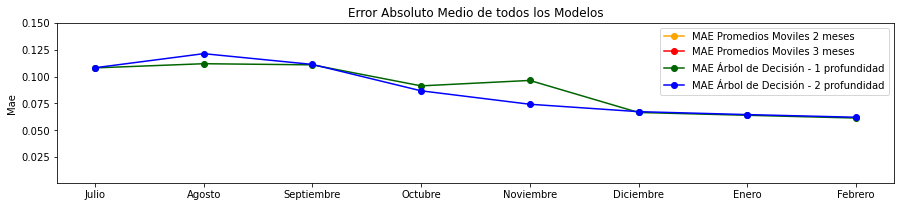

In [373]:
# Gráfica de errores de ENTRENAMIENTO MAE
plt.figure(figsize=(15,10))
plt.subplot(3, 1, 1)
plt.plot(errores_ent_mae.Mes, errores_ent_mae.Promedios_Moviles2,'o-',color="orange") #no aplica para entrenamiento
plt.plot(errores_ent_mae.Mes, errores_ent_mae.Promedios_Moviles3,'o-',color="red") #no aplica para entrenamiento
plt.plot(errores_ent_mae.Mes, errores_ent_mae.Arbol_de_Decision_1,'o-', color="darkgreen")
plt.plot(errores_ent_mae.Mes, errores_ent_mae.Arbol_de_Decision_2, 'o-', color="blue")
plt.legend(['MAE Promedios Moviles 2 meses','MAE Promedios Moviles 3 meses','MAE Árbol de Decisión - 1 profundidad','MAE Árbol de Decisión - 2 profundidad'])
plt.ylim(0.001, 0.15)
plt.ylabel('Mae')
plt.title('Error Absoluto Medio de todos los Modelos')

Text(0.5, 1.0, 'Error Cuadrado Medio de todos los Modelos')

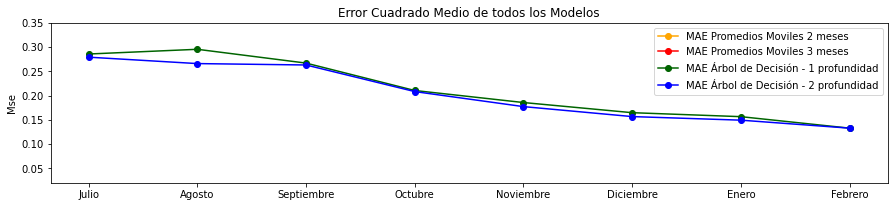

In [374]:
# Gráfica de errores de ENTRENAMIENTO MSE
plt.figure(figsize=(15,10))
plt.subplot(3, 1, 1)
plt.plot(errores_ent_mae.Mes, errores_ent_mae.Promedios_Moviles2,'o-',color="orange") #no aplica para entrenamiento
plt.plot(errores_ent_mse.Mes, errores_ent_mse.Promedios_Moviles3,'o-',color="red") #no aplica para entrenamiento
plt.plot(errores_ent_mse.Mes, errores_ent_mse.Arbol_de_Decision_1,'o-', color="darkgreen")
plt.plot(errores_ent_mae.Mes, errores_ent_mse.Arbol_de_Decision_2, 'o-', color="blue")
plt.legend(['MAE Promedios Moviles 2 meses','MAE Promedios Moviles 3 meses','MAE Árbol de Decisión - 1 profundidad','MAE Árbol de Decisión - 2 profundidad'])
plt.ylim(0.02, 0.35)
plt.ylabel('Mse')
plt.title('Error Cuadrado Medio de todos los Modelos')

Text(0.5, 1.0, 'Error Absoluto Medio de todos los Modelos')

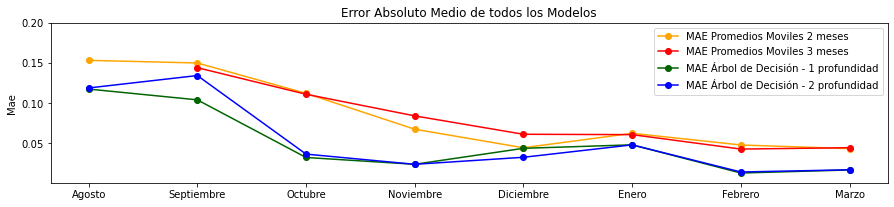

In [375]:
# Gráfica de errores de PRUEBA MAE
plt.figure(figsize=(15,10))
plt.subplot(3, 1, 1)
plt.plot(errores_prueba_mae.Mes, errores_prueba_mae.Promedios_Moviles2,'o-',color="orange") #SI aplica para entrenamiento
plt.plot(errores_prueba_mae.Mes, errores_prueba_mae.Promedios_Moviles3,'o-',color="red") #SI aplica para entrenamiento
plt.plot(errores_prueba_mae.Mes, errores_prueba_mae.Arbol_de_Decision_1,'o-', color="darkgreen")
plt.plot(errores_prueba_mae.Mes, errores_prueba_mae.Arbol_de_Decision_2, 'o-', color="blue")
plt.legend(['MAE Promedios Moviles 2 meses','MAE Promedios Moviles 3 meses','MAE Árbol de Decisión - 1 profundidad','MAE Árbol de Decisión - 2 profundidad'])
plt.ylim(0.001, 0.2)
plt.ylabel('Mae')
plt.title('Error Absoluto Medio de todos los Modelos')

Text(0.5, 1.0, 'Error Cuadratico Medio de todos los Modelos')

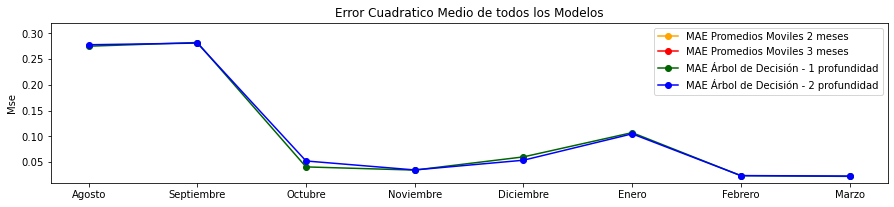

In [376]:
# Gráfica de errores de PRUEBA 
plt.figure(figsize=(15,10))
plt.subplot(3, 1, 1)
plt.plot(errores_prueba_mse.Mes, errores_prueba_mse.Promedios_Moviles2,'o-',color="orange") #SI aplica para entrenamiento
plt.plot(errores_prueba_mse.Mes, errores_prueba_mse.Promedios_Moviles3,'o-',color="red") #SI aplica para entrenamiento
plt.plot(errores_prueba_mse.Mes, errores_prueba_mse.Arbol_de_Decision_1,'o-', color="darkgreen")
plt.plot(errores_prueba_mse.Mes, errores_prueba_mse.Arbol_de_Decision_2, 'o-', color="blue")
plt.legend(['MAE Promedios Moviles 2 meses','MAE Promedios Moviles 3 meses','MAE Árbol de Decisión - 1 profundidad','MAE Árbol de Decisión - 2 profundidad'])
plt.ylim(0.01, 0.32)
plt.ylabel('Mse')
plt.title('Error Cuadratico Medio de todos los Modelos')